In [1]:
import torch
from torch.autograd import Variable
from torchvision import transforms
from matplotlib.image import imsave
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from models_8 import *

# model = Unet(3,4)
# model =torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=0)

# model.load_state_dict(torch.load('output/params_10.pth'))
# model.load_state_dict(torch.load('./model/best.pth'),0)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=0)
model =DeepLabV3()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/jovyan/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
24.9%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub

In [2]:
use_cuda = 1

model.load_state_dict(torch.load('./model/6.pth'),0)
model.eval()
if use_cuda and torch.cuda.is_available():
    model.cuda()

root=r'data'
file = os.listdir(root)

In [3]:
def iou(target,prediction):
    intersection = np.logical_and(target, prediction) 
    union = np.logical_or(target, prediction) 
    return  np.sum(intersection) / np.sum(union)

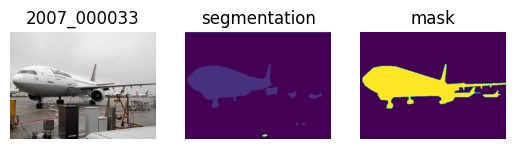

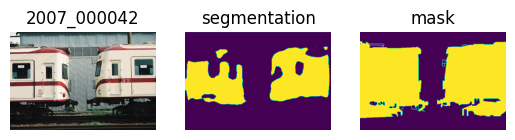

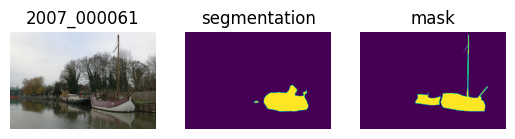

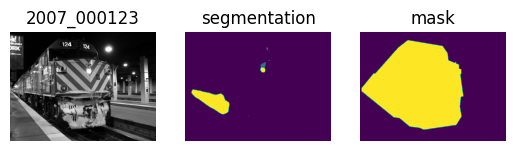

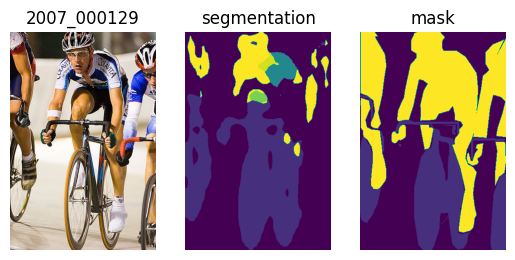

0.4942686505849051


In [4]:
img_transforms = transforms.Compose([
#     transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

imgs=[]
f=open('./data/list/val.txt')
img_names = f.readlines() 
f.close()
miou=[]
for i,name in enumerate(img_names):
    img=Image.open('./data/imgs/{}.jpg'.format(name[12:23]))
    mask=Image.open('./data/labels/{}.png'.format(name[12:23]))
#     mask=mask.resize((224,224),Image.NEAREST)
    mask=np.array(mask)
    mask[mask==255]=0
    
    img_tensor = img_transforms(img)
    
    
    img_tensor = img_tensor.unsqueeze(0)

    if use_cuda and torch.cuda.is_available():
        prediction = model(Variable(img_tensor.cuda()))
    else:
        prediction = model(Variable(img_tensor))
    prediction = prediction.squeeze(3).squeeze(2)
    pred = torch.max(prediction, 1)[1]

    result=np.array(pred.cpu())
    # np.save('result//'+line,result)
    temp=iou(mask,result)
    miou.append(temp)
    result[0,0]=3 #为了让他看以来一样
    if i<5:
        plt.subplot(1,3,1)
        plt.axis('off')
        plt.title(name[12:23])
        plt.imshow(img)

        plt.subplot(1,3,2)
        plt.axis('off')
        plt.title('segmentation')
        plt.imshow(result[0,:,:])

        plt.subplot(1,3,3)
        plt.axis('off')
        plt.title('mask')
        plt.imshow(mask)

        plt.show()
print(np.mean(miou))